In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
# Зчитування даних з файлу
data = pd.read_csv('spotify_EDA_data.csv', encoding="latin1", delimiter=",");

# Видалення зайвої ознаки
data = data.drop(columns="Unnamed: 0")

# Перетворення булевої ознаки в числову ознаку (0 або 1)
data['is_popular'] = data['is_popular'].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            313 non-null    object 
 1   artist(s)_name        313 non-null    object 
 2   streams               313 non-null    int64  
 3   in_deezer_playlists   313 non-null    object 
 4   in_shazam_charts      313 non-null    object 
 5   key                   313 non-null    object 
 6   mode                  313 non-null    object 
 7   artist_count          313 non-null    float64
 8   released_year         313 non-null    float64
 9   released_month        313 non-null    float64
 10  released_day          313 non-null    float64
 11  in_spotify_playlists  313 non-null    float64
 12  in_spotify_charts     313 non-null    float64
 13  in_apple_playlists    313 non-null    float64
 14  in_apple_charts       313 non-null    float64
 15  in_deezer_charts      3

In [2]:
X = data[['in_spotify_playlists', 'danceability_%']]
Y = data['is_popular']

In [3]:
# Розбиття dataset на тренувальні та тестові дані за допомогою train_test_split, який ми імпортували
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [4]:
# Initialize SVM classifier
clf = SVC(kernel='linear')

# Fit data
clf = clf.fit(X_train, y_train)

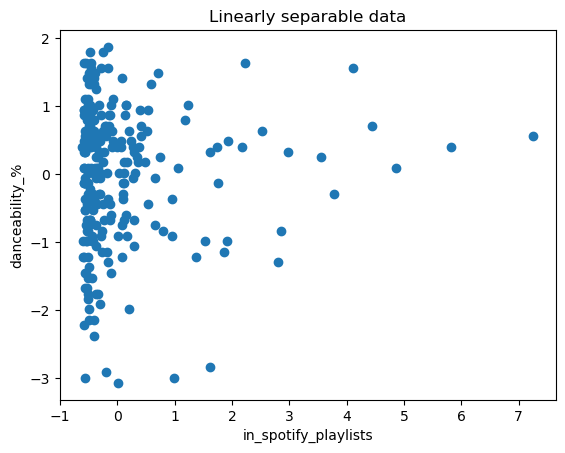

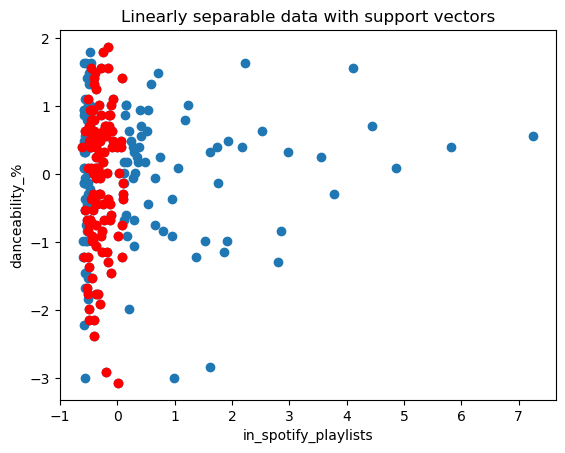

In [5]:
# Generate scatter plot for training data
plt.scatter(X_train['in_spotify_playlists'], X_train['danceability_%'])
plt.title('Linearly separable data')
plt.xlabel('in_spotify_playlists')
plt.ylabel('danceability_%')
plt.show()

# Get support vectors themselves
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(X_train['in_spotify_playlists'], X_train['danceability_%'])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('in_spotify_playlists')
plt.ylabel('danceability_%')
plt.show()

C:\Users\amigo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\amigo\AppData\Local\Temp\ipykernel_2716\2715980307.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_subset = X_set[Y == j]


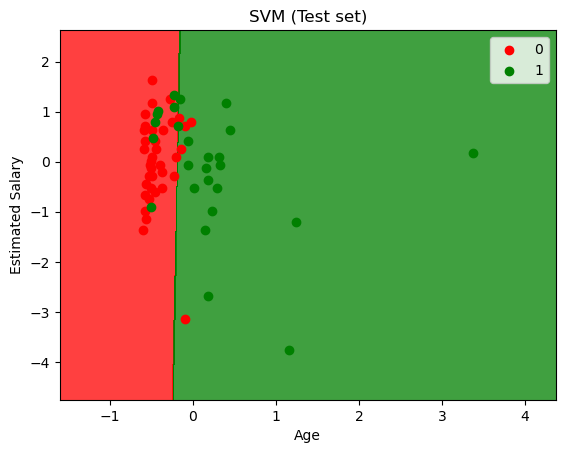

In [6]:
import numpy as np
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, stop = X_set.iloc[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set.iloc[:, 1].min() - 1, stop = X_set.iloc[:, 1].max() + 1, step = 0.01))

# Зафарбовування зони прийняття рішень
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

# Налаштування області графіку
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Розміщення точок тестового набору
for i, j in enumerate(np.unique(y_set)):
    X_subset = X_set[Y == j]
    plt.scatter(X_subset['in_spotify_playlists'], X_subset['danceability_%'],
                color=ListedColormap(('red', 'green')).colors[i], label=str(j))

# Додавання заголовку та підписів до графіку
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [7]:
# Прогнозування на тестових даних
y_pred = clf.predict(X_test)

# Оцінка точності моделі
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8095238095238095
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        37
           1       0.79      0.73      0.76        26

    accuracy                           0.81        63
   macro avg       0.81      0.80      0.80        63
weighted avg       0.81      0.81      0.81        63



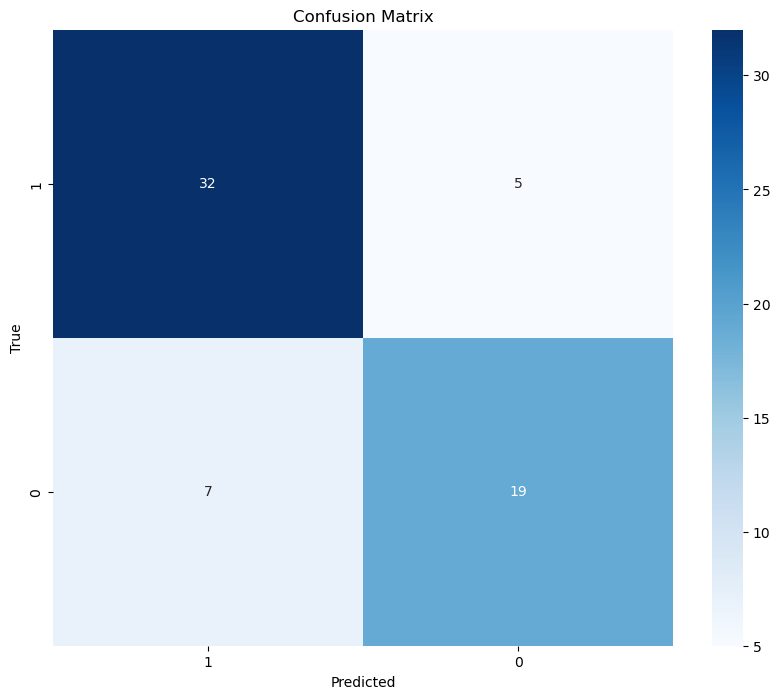

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score

import seaborn as sns
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=data['is_popular'].unique(),
            yticklabels=data['is_popular'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

# Параметри моделі SVM
C_values = [0.1, 1, 5, 10]
kernel = 'linear'
best_accuracy = 0.0  # Initialize the best accuracy

# Ініціалізація та тренування моделі для кожного значення C
for C in C_values:
    clf = SVC(kernel=kernel, C=C, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for C={C}: {accuracy}")

    # Check if this C gives a better accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_C = C

# Оцінка параметрів оптимальної моделі
print("Parameters of the best model:")
print("Kernel:", kernel)
print("Best C:", best_C)
print("Best Accuracy:", best_accuracy)

# Train the best model
best_clf = SVC(kernel=kernel, C=best_C, random_state=42)
best_clf.fit(X_train, y_train)
y_pred_best = best_clf.predict(X_test)

# Print classification report for the best model
print("Classification Report for the best model:\n", classification_report(y_test, y_pred_best))


Accuracy for C=0.1: 0.8095238095238095
Accuracy for C=1: 0.8095238095238095
Accuracy for C=5: 0.8095238095238095
Accuracy for C=10: 0.7936507936507936
Parameters of the best model:
Kernel: linear
Best C: 0.1
Best Accuracy: 0.8095238095238095
Classification Report for the best model:
               precision    recall  f1-score   support

           0       0.78      0.95      0.85        37
           1       0.89      0.62      0.73        26

    accuracy                           0.81        63
   macro avg       0.83      0.78      0.79        63
weighted avg       0.82      0.81      0.80        63

